## Predictive Modeling of Income Levels based on Demographic and Employment Features

# Data Dictionary
*  Age: The age of an employee
* Work-class: Profession category 
* Final_census : Census(population of the country)
* Education: Type of last (max) Education
* Education_num: Years spend on studies
*  Marital Status: Person married or not
* Occupation: Person 
* Relationship: Bounded by any relation or dependent 
* Race: which ethnicity belongs to the employee 
* Gender: gender of the employee
* Capital-gain: Capital gain refers to the profit earned when selling a capital asset, such as stocks, real estate, or valuable possessions. It represents the difference between the selling price of the asset and its original purchase price.
* Capital-loss: Capital loss refers to the financial loss incurred when selling a capital asset at a price lower than its original purchase price. It represents the negative difference between the selling price and the purchase price of the asset.
* Hours/week : How many working hours in a week
* Country : Country where it belongs


* Income threshold(Target Column) : two range of Income one is <=50k and >50K



# The problem is a binary classification problem.
The two classes in the target column are:

                                  1. Income <=50k
                                  
                                  2. Income >50k

# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Importing data

In [2]:
df=pd.read_csv("Data_inc.csv")

In [3]:
df.shape

(32561, 16)

 The dataset  has 32561 rows and 16 columns

In [4]:
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  32561 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       32561 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          32561 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

In [6]:
# There is only 2 non-null values in the column "Unnamed: 15". So drop it.
df.drop(["Unnamed: 15"],axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3    Education        32561 non-null  object
 4    Education-num    32561 non-null  int64 
 5    marital-status   32561 non-null  object
 6    occupation       32561 non-null  object
 7    relationship     32561 non-null  object
 8    race             32561 non-null  object
 9   Gender            32561 non-null  object
 10   capital-gain     32561 non-null  int64 
 11   capital-loss     32561 non-null  int64 
 12   hours-per-week   32561 non-null  int64 
 13   country          32561 non-null  object
 14   income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.describe()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.isnull().sum() # All the remaining columns has zero null values

Age                 0
Profession Class    0
Final_census        0
 Education          0
 Education-num      0
 marital-status     0
 occupation         0
 relationship       0
 race               0
Gender              0
 capital-gain       0
 capital-loss       0
 hours-per-week     0
 country            0
 income             0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3    Education        32561 non-null  object
 4    Education-num    32561 non-null  int64 
 5    marital-status   32561 non-null  object
 6    occupation       32561 non-null  object
 7    relationship     32561 non-null  object
 8    race             32561 non-null  object
 9   Gender            32561 non-null  object
 10   capital-gain     32561 non-null  int64 
 11   capital-loss     32561 non-null  int64 
 12   hours-per-week   32561 non-null  int64 
 13   country          32561 non-null  object
 14   income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
#Note that some of the column names has extra spaces at the beginning, so for convenience let's remove the spaces.
old_names=df.columns
new_names=[i.strip() for i in df.columns]
df=df.rename(columns=dict(zip(old_names,new_names)))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-num     32561 non-null  int64 
 5   marital-status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   Gender            32561 non-null  object
 10  capital-gain      32561 non-null  int64 
 11  capital-loss      32561 non-null  int64 
 12  hours-per-week    32561 non-null  int64 
 13  country           32561 non-null  object
 14  income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
#Check for duplicate rows
df.duplicated().sum() #There are 24 duplicated rows

24

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape  # Note   that the number of rows has decreased. That is, the duplicated rows are deleted!!

(32537, 15)

# EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32537 non-null  int64 
 1   Profession Class  32537 non-null  object
 2   Final_census      32537 non-null  int64 
 3   Education         32537 non-null  object
 4   Education-num     32537 non-null  int64 
 5   marital-status    32537 non-null  object
 6   occupation        32537 non-null  object
 7   relationship      32537 non-null  object
 8   race              32537 non-null  object
 9   Gender            32537 non-null  object
 10  capital-gain      32537 non-null  int64 
 11  capital-loss      32537 non-null  int64 
 12  hours-per-week    32537 non-null  int64 
 13  country           32537 non-null  object
 14  income            32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [17]:
#Separating the categorical and numerical columns for viewing convenience
numerical_columns = df.select_dtypes(include='int64')
categorical_columns = df.select_dtypes(include='object')

In [18]:
numerical_columns

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [19]:
categorical_columns

,Profession Class,Education,marital-status,occupation,relationship,race,Gender,country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


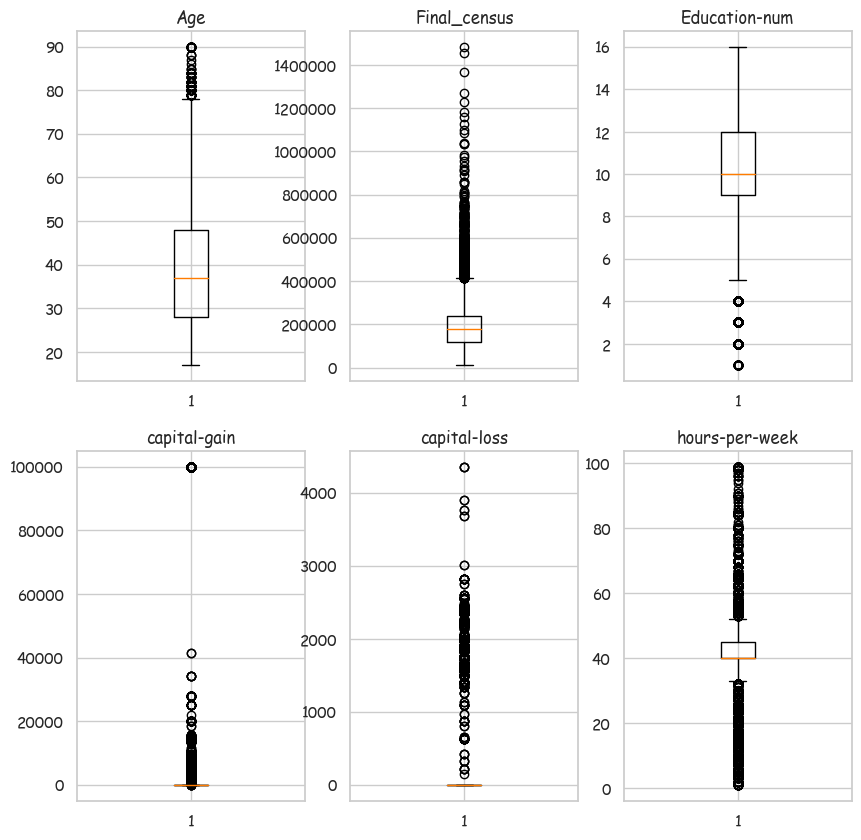

In [20]:
# Plot box plots for numerical columns. There are 6 numerical columns.
sns.set_theme(context="notebook",style="whitegrid",palette="bright",font="cursive")
plt.figure(figsize=(10,10),dpi=100)
for i,j in enumerate(numerical_columns.columns):
    plt.subplot(2,3,i+1)
    plt.ticklabel_format(style='plain')
    plt.boxplot(numerical_columns[j])
    plt.title(j)

There are outliers in all the numerical columns. In the columns of 'capital-gain' and 'capital loss' most of the values (almost 75%) are '0'.

In [21]:
df["capital-gain"].value_counts()

0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

In [22]:
df["capital-loss"].value_counts()

0       31018
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64

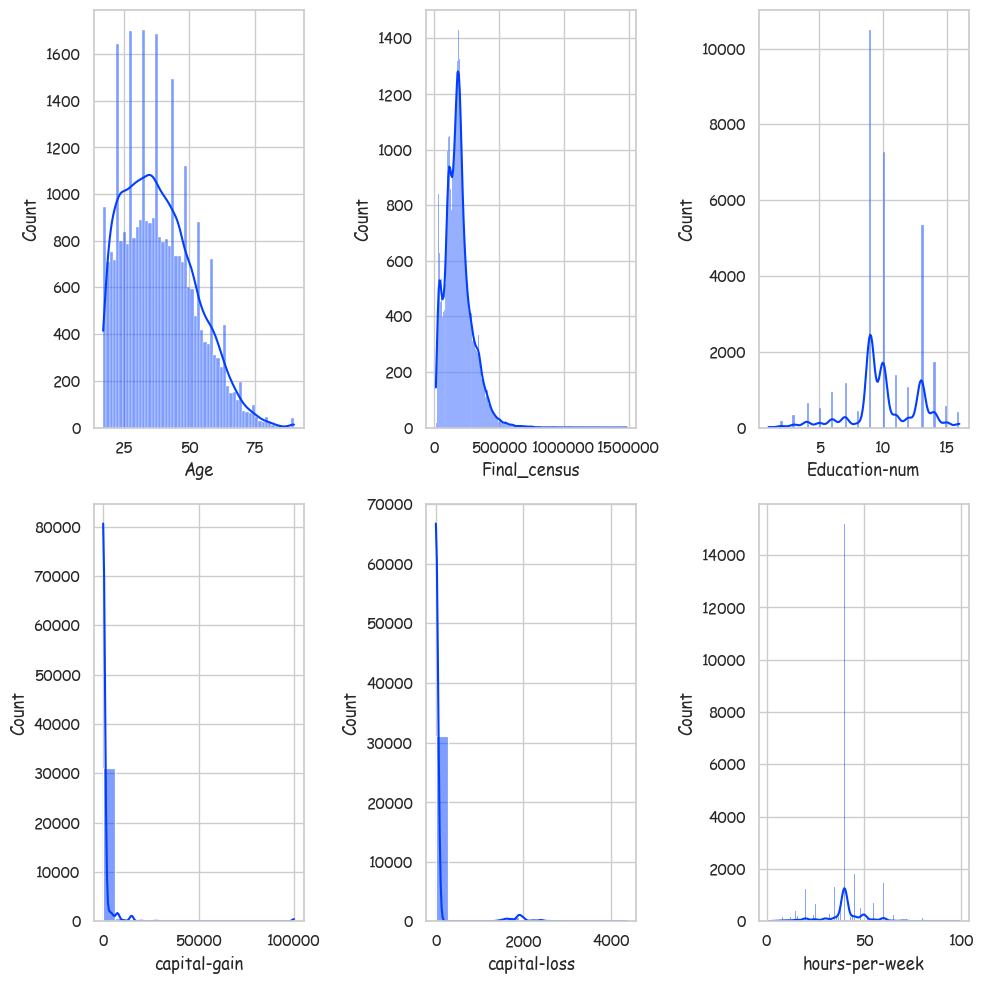

In [23]:
# Plot histograms for numerical columns. There are 6 numerical columns.
sns.set_theme(context="notebook",style="whitegrid",palette="bright",font="cursive")
plt.figure(figsize=(10,10),dpi=100)
for i,j in enumerate(numerical_columns.columns):
    plt.subplot(2,3,i+1)
    plt.ticklabel_format(style='plain')
    sns.histplot(numerical_columns[j],kde=True)
    plt.tight_layout()
plt.show()    

The histogram is right skewed for 'Age','Final_census','capital-gain' and 'capital-loss'.

In [24]:
# Plot countplots for categorical columns. There are 9 numerical columns.
# Print the categorical column names
categorical_columns.columns

Index(['Profession Class', 'Education', 'marital-status', 'occupation',
       'relationship', 'race', 'Gender', 'country', 'income'],
      dtype='object')

In [25]:
# Convert the categorical columns to string datatype.
for i in categorical_columns.columns:
    df[i]=df[i].astype('string')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32537 non-null  int64 
 1   Profession Class  32537 non-null  string
 2   Final_census      32537 non-null  int64 
 3   Education         32537 non-null  string
 4   Education-num     32537 non-null  int64 
 5   marital-status    32537 non-null  string
 6   occupation        32537 non-null  string
 7   relationship      32537 non-null  string
 8   race              32537 non-null  string
 9   Gender            32537 non-null  string
 10  capital-gain      32537 non-null  int64 
 11  capital-loss      32537 non-null  int64 
 12  hours-per-week    32537 non-null  int64 
 13  country           32537 non-null  string
 14  income            32537 non-null  string
dtypes: int64(6), string(9)
memory usage: 4.0 MB


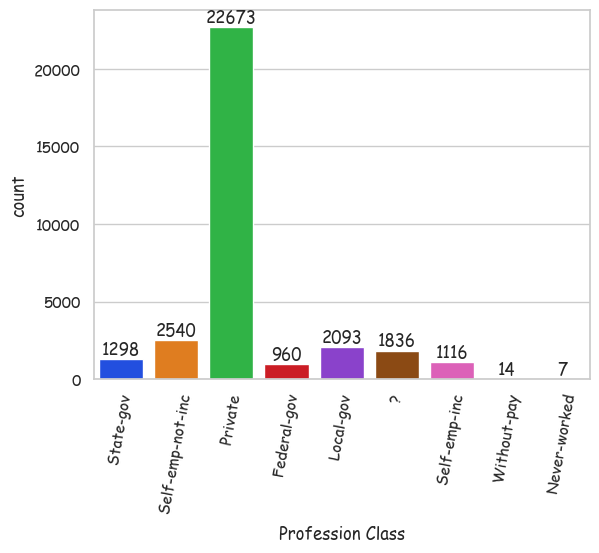

In [27]:
# count plot of column "Profession Class"
sns.set_theme(context="notebook",style="whitegrid",palette="bright",font="cursive")
ax=sns.countplot(df["Profession Class"])
plt.xticks(rotation=80)
ax.bar_label(ax.containers[0])
plt.show()

Note that one of the bar in the above countplot is labeled as '?'.
1836 values in the column 'Profession Class' are missing and has to be treated.
Majority of the people work in private sector.

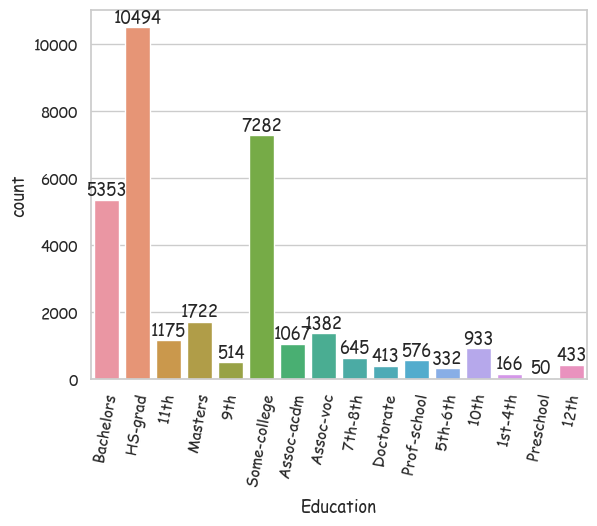

In [28]:
# count plot of column "Education"
sns.set_theme(context="notebook",style="whitegrid",palette="bright",font="cursive")
ax=sns.countplot(df["Education"])
plt.xticks(rotation=80)
ax.bar_label(ax.containers[0])
plt.show()


The education column has 16 categories. Most of the categories can be grouped to reduce the number of categories.

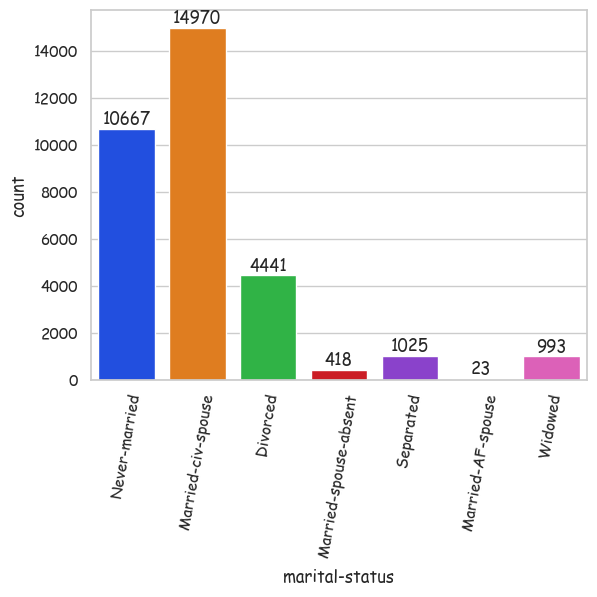

In [29]:
# count plot of column "marital-status"
sns.set_theme(context="notebook",style="whitegrid",palette="bright",font="cursive")
ax=sns.countplot(df["marital-status"])
plt.xticks(rotation=80)
ax.bar_label(ax.containers[0])
plt.show()

Most of the people have 'marital-status' as 'Married-civ-spouse' and least have 'Married-AF-spouse'.

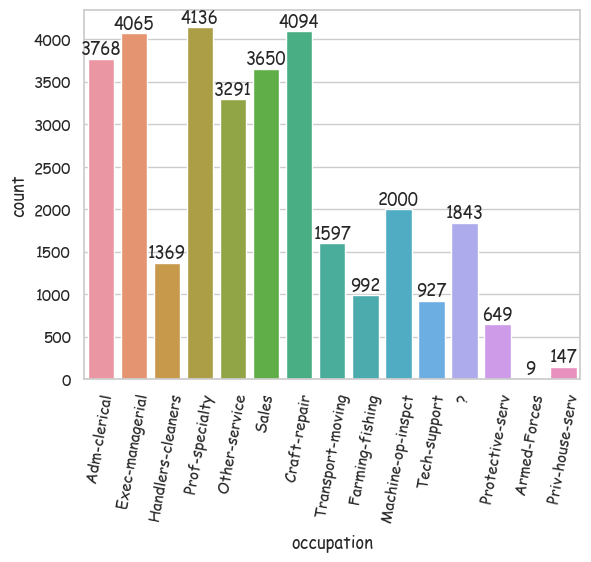

In [30]:
# count plot of column 'occupation'
sns.set_theme(context="notebook",style="whitegrid",palette="bright",font="cursive")
ax=sns.countplot(df["occupation"])
plt.xticks(rotation=80)
ax.bar_label(ax.containers[0])
plt.show()

Note that one of the bar in the above countplot is labeled as '?'.
1843 values in the  column 'occupation' are missing and has to be treated.
This column has more missing values than that of 'Profession Class'.

In [31]:
pd.concat([df['Profession Class'].value_counts(), df['occupation'].value_counts()],axis=1)

,Profession Class,occupation
Private,22673,<NA>
Self-emp-not-inc,2540,<NA>
Local-gov,2093,<NA>
?,1836,1843
State-gov,1298,<NA>
Self-emp-inc,1116,<NA>
Federal-gov,960,<NA>
Without-pay,14,<NA>
Never-worked,7,<NA>
Prof-specialty,<NA>,4136


It seems like the 7 people in 'Profession class' 'Never-worked' is included with missing occupation so that; 1836+7=1843.

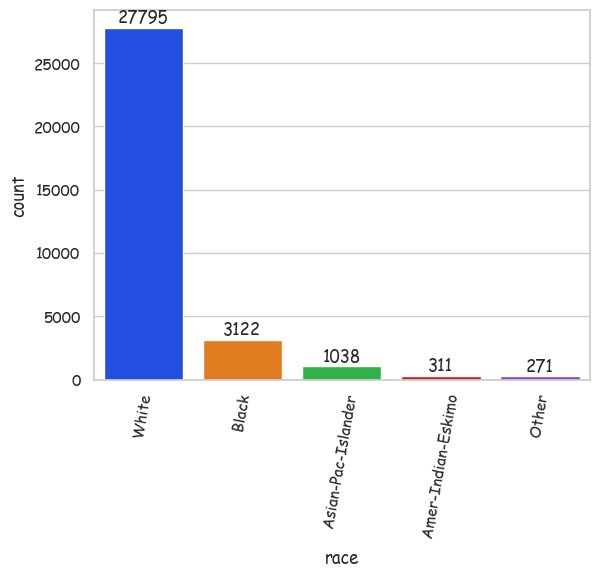

In [32]:
# count plot of column 'race' 
sns.set_theme(context="notebook",style="whitegrid",palette="bright",font="cursive")
ax=sns.countplot(df["race"])
plt.xticks(rotation=80)
ax.bar_label(ax.containers[0])
plt.show()

Majority of people included have race 'White'. Dataset is certainly biased.

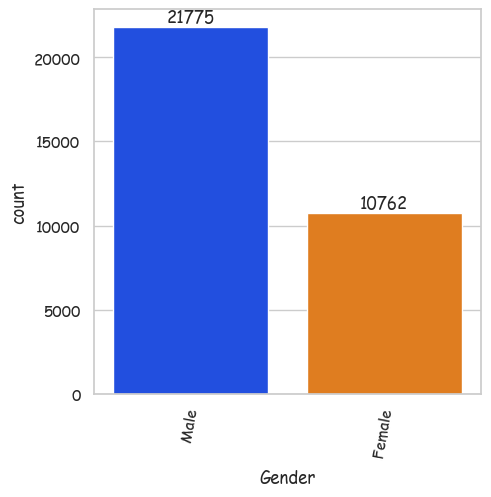

In [33]:
# count plot of column 'Gender'
plt.figure(figsize=(5,5))
sns.set_theme(context="notebook",style="whitegrid",palette="bright",font="cursive")
ax=sns.countplot(df["Gender"])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=80)
plt.show()

Number of males is way more than number of females.

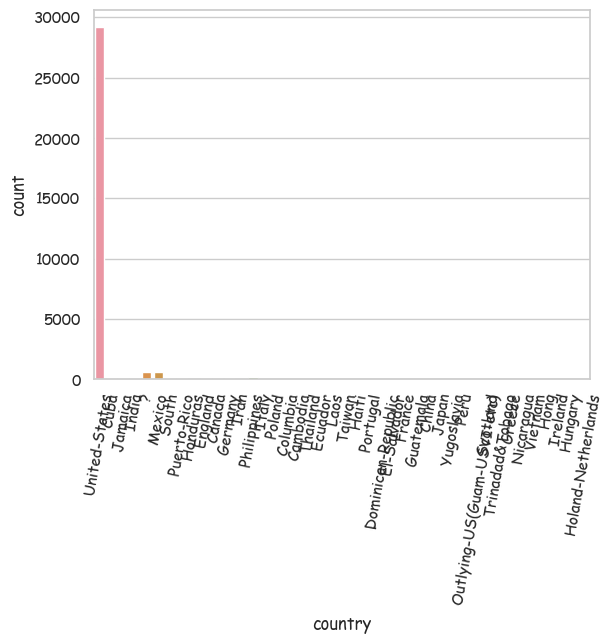

In [34]:
# count plot of column  'country'
sns.set_theme(context="notebook",style="whitegrid",palette="bright",font="cursive")
sns.countplot(df["country"])
plt.xticks(rotation=80)
plt.show()

In [35]:
df['country'].value_counts()

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

There are 582 missing values in this column 'country' and has to be treated.

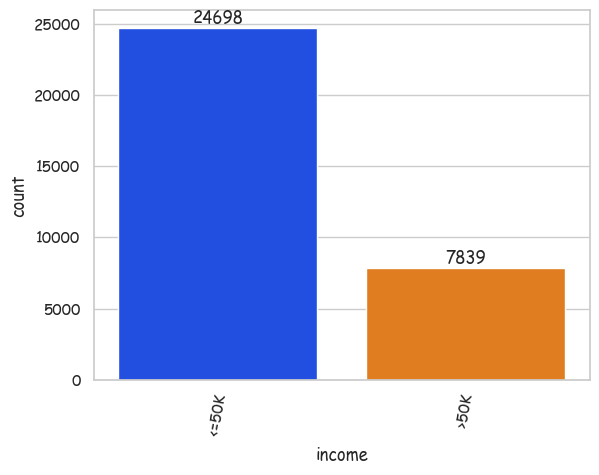

In [36]:
# count plot of column  'income'
sns.set_theme(context="notebook",style="whitegrid",palette="bright",font="cursive")
ax=sns.countplot(df["income"])
plt.xticks(rotation=80)
ax.bar_label(ax.containers[0])
plt.show()

The above countplot represents the target column income.
The bars are of very different heights and so the data is highly imbalanced.
So we will use stratified sampling

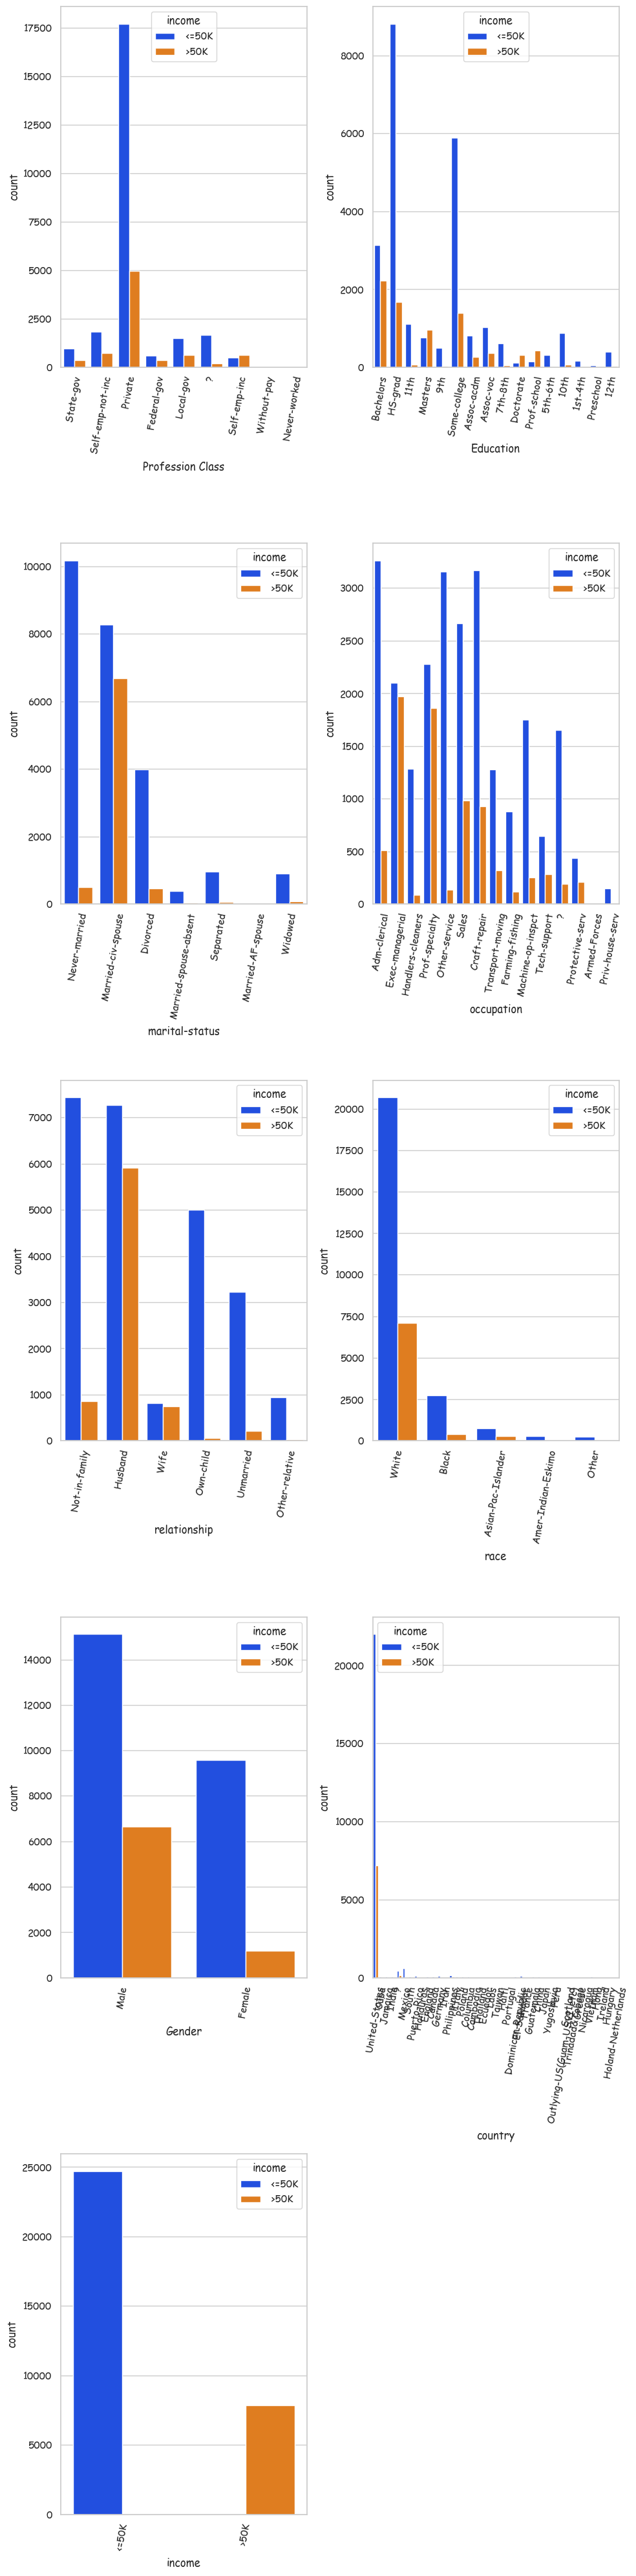

In [37]:
#Countplots of categorical columns bifurcated on the basis of the target column.
sns.set_theme(context="notebook",style="whitegrid",palette="bright",font="cursive")
plt.figure(figsize=(10,40),dpi=100)
for i,j in enumerate(categorical_columns.columns):
    plt.subplot(5,2,i+1)
    sns.countplot(categorical_columns[j],hue=df['income'])
    plt.xticks(rotation=80)
    plt.tight_layout()
plt.show()   

Following conclusions can be made from the above graphs.
* All categories in 'Profession Class' has people with income >50k.
* More people with 'Education' Masters/Doctorate/Prof-school has income >50k than income <=50k. Also, note that even some HS-grads has income >50k. But only few school dropouts has income >50k.
* The category in 'marital-status' married-civ-spouse has more proportion of people with income >50k.
* 'Occupation' exec-managerial or prof-speciality has highest ratios of people with income >50k.
* A person has high chance of earning >50K in case the race is ‘White’/’Asian-pac-islander’.
* Males have a higher chance of earning more than 50K, than females.
* If the relationship in family is either ‘Husband/Wife’, the chances of earning more than 50K is high.

* For all the columns with missing values, the missing value category '?' has rows with income >50k. So removing these rows will result in information loss.


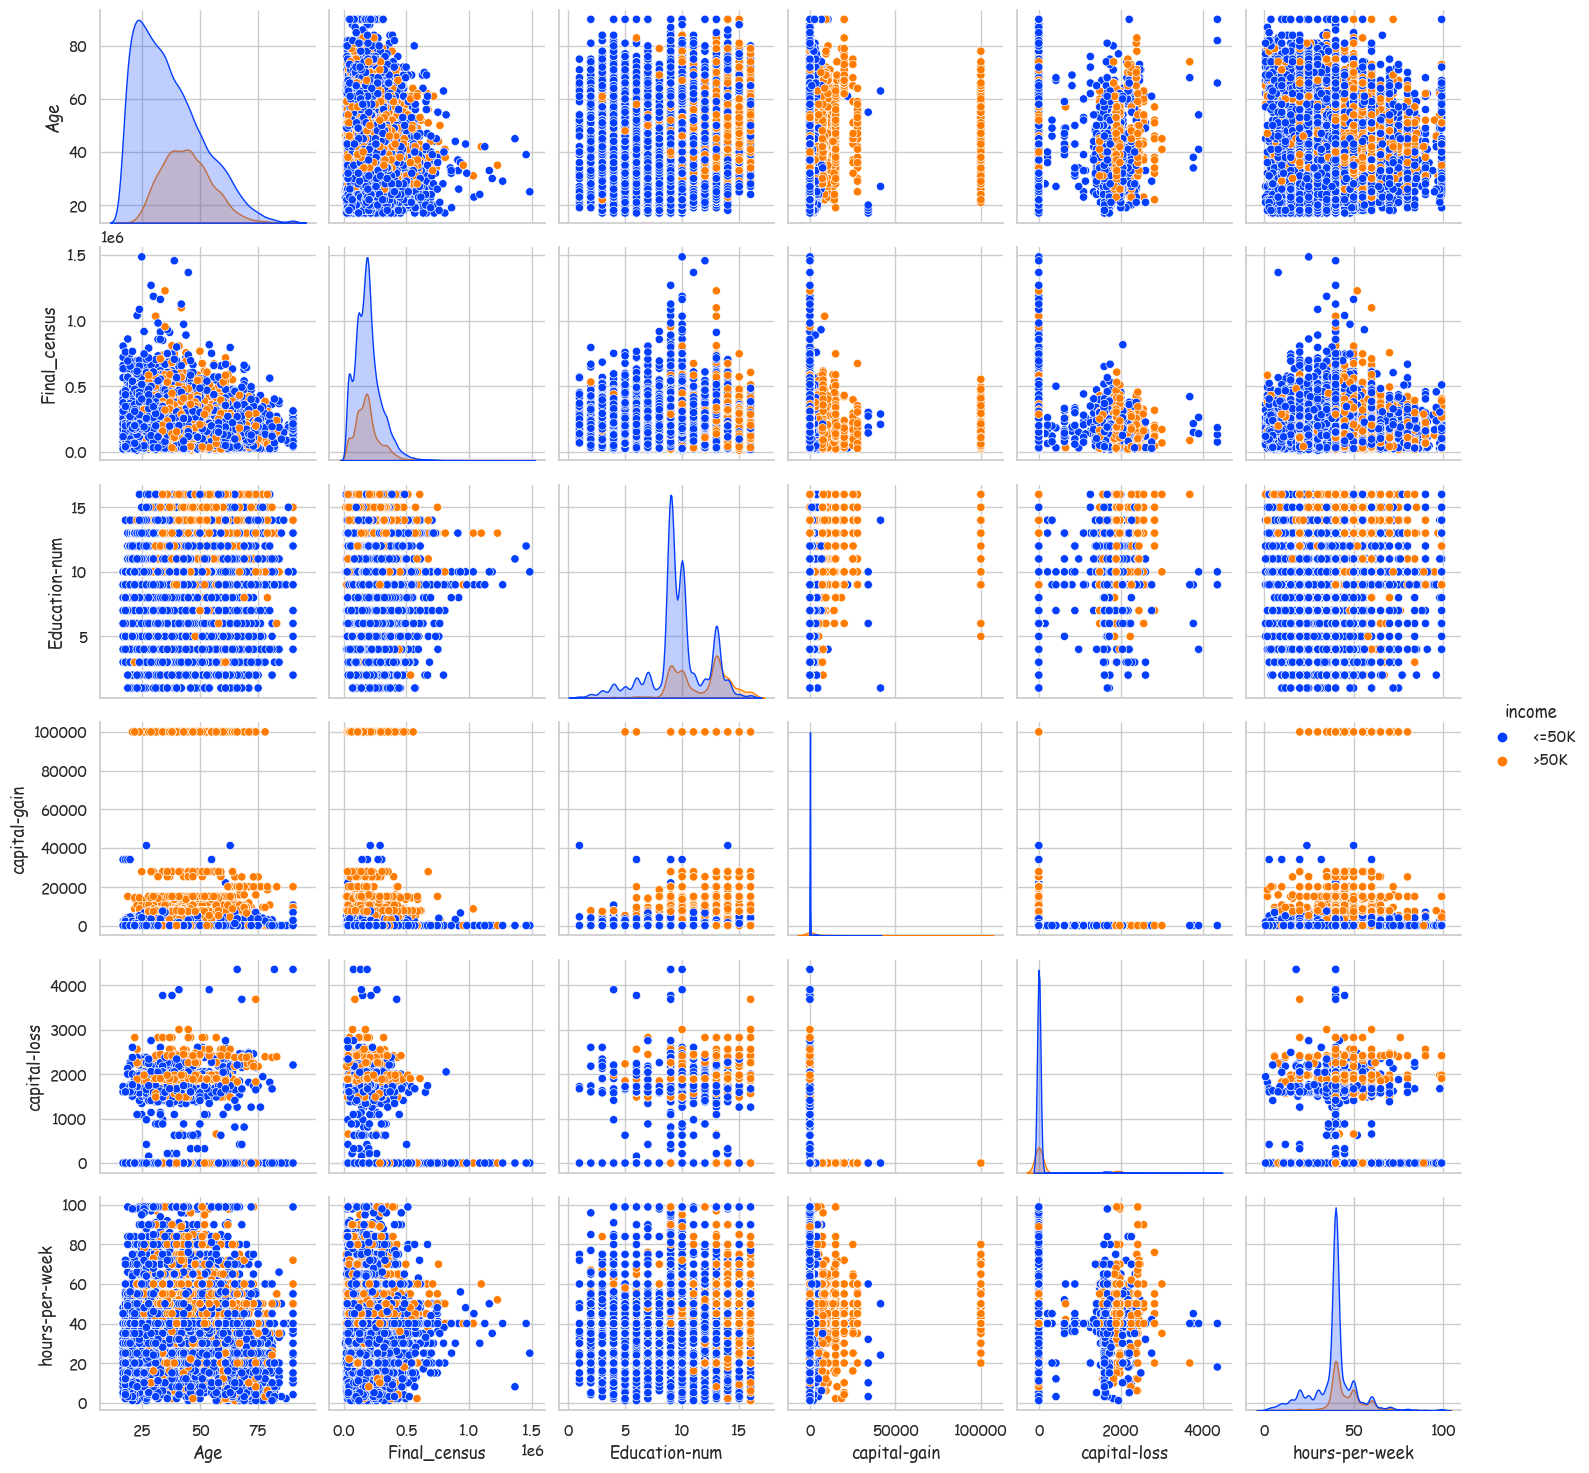

In [38]:
#pairplot of numerical columns based on target column.
sns.pairplot(df,hue="income")

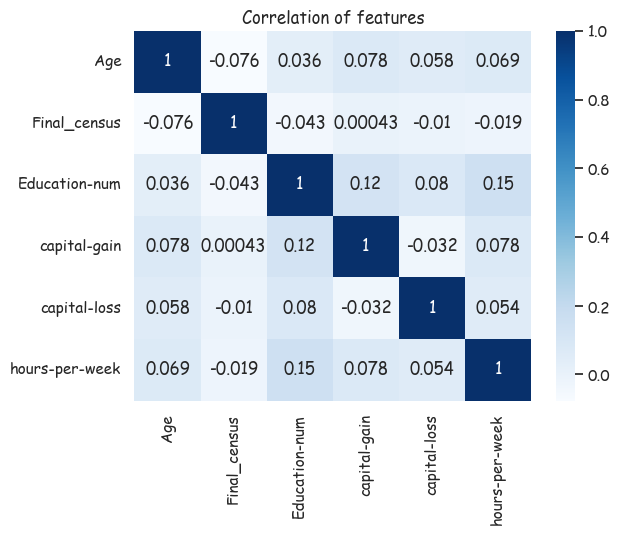

In [39]:
#Use a heat map to get an idea of correlation between numerical columns.
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.title('Correlation of features')
plt.show()

In [40]:
df.corr()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
Age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
Final_census,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
Education-num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital-gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital-loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours-per-week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


All the correlations are weak.

In [41]:
categorical_columns.columns

Index(['Profession Class', 'Education', 'marital-status', 'occupation',
       'relationship', 'race', 'Gender', 'country', 'income'],
      dtype='object')

# Pre-processing and cleaning

## Handling missing values

In [42]:
#Handling missing values '?' in the categorical columns "Profession Class', 'occupation' and 'country'.
# Droping rows with missing values will decrease the rows with values ''>50K' in target column;
#which will further increase the imbalance.
#So use imputation method to replace '?' with mode value in the corresponding columns.
import re
df['Profession Class'].replace('.*\?.*',df['Profession Class'].mode()[0],regex=True,inplace=True)
df['occupation'].replace('.*\?.*',df['occupation'].mode()[0],regex=True,inplace=True)
df['country'].replace('.*\?.*',df['country'].mode()[0],regex=True,inplace=True)

In [43]:
df['Profession Class'].value_counts()

Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Profession Class, dtype: Int64

## Feature Engineering 

### Combining categories

In [44]:
#Print the categorical columns and list of different categories in each column
pd.set_option('display.max_colwidth',None)
pd.DataFrame({'column':categorical_columns.columns, 'catgories':[df[i].unique() for i in categorical_columns.columns]}).transpose()

,0,1,2,3,4,5,6,7,8
column,Profession Class,Education,marital-status,occupation,relationship,race,Gender,country,income
catgories,"[ State-gov, Self-emp-not-inc, Private, Federal-gov, Local-gov, Self-emp-inc, Without-pay, Never-worked]","[ Bachelors, HS-grad, 11th, Masters, 9th, Some-college, Assoc-acdm, Assoc-voc, 7th-8th, Doctorate, Prof-school, 5th-6th, 10th, 1st-4th, Preschool, 12th]","[ Never-married, Married-civ-spouse, Divorced, Married-spouse-absent, Separated, Married-AF-spouse, Widowed]","[ Adm-clerical, Exec-managerial, Handlers-cleaners, Prof-specialty, Other-service, Sales, Craft-repair, Transport-moving, Farming-fishing, Machine-op-inspct, Tech-support, Protective-serv, Armed-Forces, Priv-house-serv]","[ Not-in-family, Husband, Wife, Own-child, Unmarried, Other-relative]","[ White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, Other]","[ Male, Female]","[ United-States, Cuba, Jamaica, India, Mexico, South, Puerto-Rico, Honduras, England, Canada, Germany, Iran, Philippines, Italy, Poland, Columbia, Cambodia, Thailand, Ecuador, Laos, Taiwan, Haiti, Portugal, Dominican-Republic, El-Salvador, France, Guatemala, China, Japan, Yugoslavia, Peru, Outlying-US(Guam-USVI-etc), Scotland, Trinadad&Tobago, Greece, Nicaragua, Vietnam, Hong, Ireland, Hungary, Holand-Netherlands]","[ <=50K, >50K]"


#### Combine categories in 'Education' column  with categories lower than 'HS-grad' as 'HS not completed', and categories  ‘Assoc-acdm’ , ‘Assoc-voc’,‘Some-college’ in one category ‘community College’.

In [45]:
for i in ['.*11th.*', '.*9th.*','.*7th-8th.*', '.*5th-6th.*', '.*10th.*', '.*1st-4th.*', '.*12th.*','.*Preschool.*']:
    df['Education'].replace(i,'HS not completed',regex=True,inplace=True)    
for i in ['.*Assoc-voc.*', '.*Assoc-acdm.*','.*Some-college.*']:
    df['Education'].replace(i,'Community College',regex=True,inplace=True)    
df['Education'].value_counts()

 HS-grad             10494
Community College     9731
 Bachelors            5353
HS not completed      4248
 Masters              1722
 Prof-school           576
 Doctorate             413
Name: Education, dtype: Int64

#### In column 'marital-status' combine ‘Divorced’, ‘Married-spouse-absent’, ‘Separated’, ‘Widowed’ and  to one category and name it as ‘No spouse now’.

In [46]:
for i in ['.*Divorced.*', '.*Married-spouse-absent.*','.*Separated.*', '.*Widowed.*']:
    df['marital-status'].replace(i,'No spouse now',regex=True,inplace=True)    
df['marital-status'].value_counts()

 Married-civ-spouse    14970
 Never-married         10667
No spouse now           6877
 Married-AF-spouse        23
Name: marital-status, dtype: Int64

## Outlier Treatment

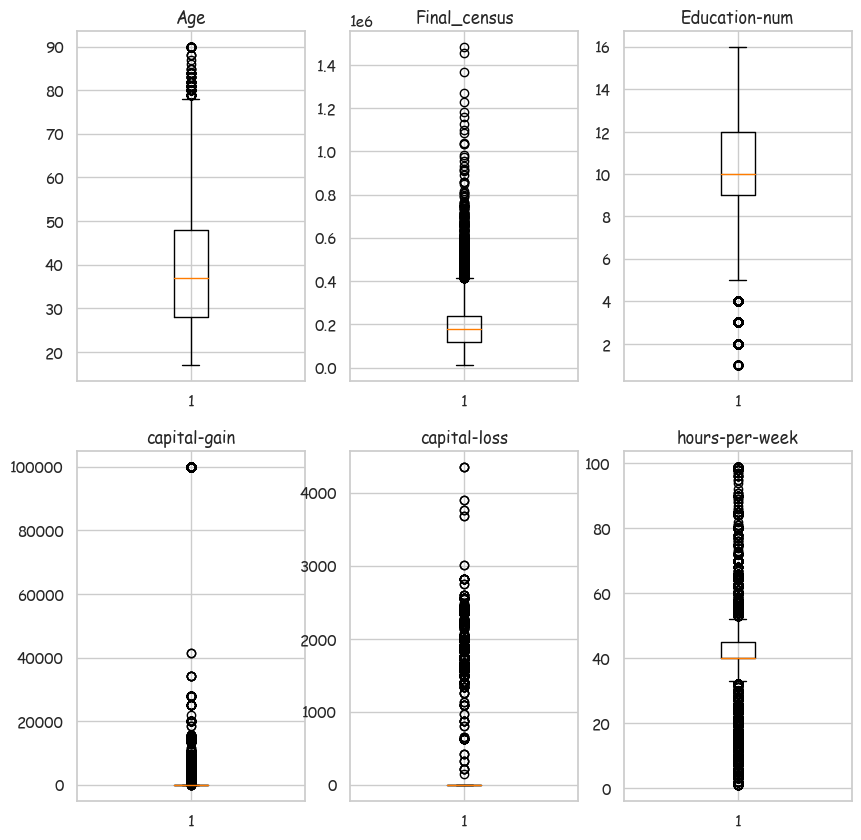

In [47]:
 # Plot box plots for numerical columns. There are 6 numerical columns.
sns.set_theme(context="notebook",style="whitegrid",palette="bright",font="cursive")
plt.figure(figsize=(10,10),dpi=100)
for i,j in enumerate(numerical_columns.columns):
    plt.subplot(2,3,i+1)
    plt.boxplot(numerical_columns[j])
    plt.title(j)                                                                                                                                          

All numerical columns has outliers. So removing the rows with outliers will result in information loss.
Looking closely at the dataset, it can be noticed that these outliers are not due to error.
The extremely large values in capital-loss and capital-gain may decide the income category and so should not be removed or replaced.
So we will keep it unchanged.

In [48]:
df.describe()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Skewness and Kurtosis¶

In [49]:
df.skew()    #  high skewness for capital-gain,capital-loss.

Age                0.557663
Final_census       1.447703
Education-num     -0.309500
capital-gain      11.949403
capital-loss       4.592702
hours-per-week     0.228759
dtype: float64

In [50]:
df.kurt()  # high kurtosis for Final_census,capital-gain,capital-loss.

Age                -0.169850
Final_census        6.222006
Education-num       0.619024
capital-gain      154.682954
capital-loss       20.358254
hours-per-week      2.917718
dtype: float64

The columns Final_census,capital-gain,capital-loss are right skewed.

## Feature Encoding

In [51]:
categorical_columns.columns

Index(['Profession Class', 'Education', 'marital-status', 'occupation',
       'relationship', 'race', 'Gender', 'country', 'income'],
      dtype='object')

In [52]:
# Using mapping Approach for Traget column income.
df['income']=df['income'].apply(lambda x:str.strip(x)).map({'<=50K':0,'>50K':1})

In [53]:
df['income'].value_counts()

0    24698
1     7839
Name: income, dtype: int64

In [54]:
# Using One hot encoding for other categorical columns.
df_encdd=pd.get_dummies(df,columns=['Profession Class', 'Education', 'marital-status', 'occupation',
       'relationship', 'race', 'Gender', 'country'],prefix=['Prof', 'Ed', 'm-s', 'occup',
       'rltn', 'race', 'Gen', 'country'],drop_first=True)

In [55]:
df_encdd.head()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week,income,Prof_ Local-gov,Prof_ Never-worked,Prof_ Private,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df_encdd.shape

(32537, 86)

### Separating the dependent variable (Target) and independent variables (Features)

In [57]:
X=df_encdd.drop(['income'],axis=1)
Y=df_encdd['income']

## Scaling the data
Since there are certain columns with very small values and some columns with high values, we will scale the columns.

In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

# Train-test split

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2, random_state=100,stratify=Y)

## Importing classification models  and metrics

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [61]:
# creating instances for classification models
lg=LogisticRegression()
svc=SVC()
nb=GaussianNB()
knc=KNeighborsClassifier()
dt=DecisionTreeClassifier()

### Fitting models and checking classification metrics

In [62]:
models=[lg,svc,nb,knc,dt]
for i in models:
    i.fit(X_train,Y_train)
    pred=i.predict(X_test)
    train_score=accuracy_score(Y_train,i.predict(X_train))
    test_score=accuracy_score(Y_test,pred)
    print(i)
    print('Accuracy score of train data is: ',train_score)   
    print('Accuracy score of test data is: ',test_score) 
    print('classification_report :')
    print(classification_report(Y_test,pred))
    print('Confusion matrix :')    
    print(confusion_matrix(Y_test,pred))
    print('*'*100)

LogisticRegression()
Accuracy score of train data is:  0.8530485228014907
Accuracy score of test data is:  0.8486478180700676
classification_report :
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4940
           1       0.73      0.60      0.66      1568

    accuracy                           0.85      6508
   macro avg       0.80      0.76      0.78      6508
weighted avg       0.84      0.85      0.84      6508

Confusion matrix :
[[4585  355]
 [ 630  938]]
****************************************************************************************************
SVC()
Accuracy score of train data is:  0.8616158899688808
Accuracy score of test data is:  0.8491087891825445
classification_report :
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4940
           1       0.74      0.58      0.65      1568

    accuracy                           0.85      6508
   macro avg       0.81

#### The accuracy score for test data is highest for  SVC.
#### DecisionTreeClassifier() overfits the data: has accuray score 99.99%  for train data, but only 81% for test data.


## Trying ensemble classification models

In [63]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
ensemble_models=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

In [64]:
for i in ensemble_models:
    i.fit(X_train,Y_train)
    pred=i.predict(X_test)
    train_score=accuracy_score(Y_train,i.predict(X_train))
    test_score=accuracy_score(Y_test,pred)
    print(i)
    print('Accuracy score of train data is: ',train_score)   
    print('Accuracy score of test data is: ',test_score) 
    print('classification_report :')
    print(classification_report(Y_test,pred))
    print('Confusion matrix :')    
    print(confusion_matrix(Y_test,pred))
    print('*'*100)

RandomForestClassifier()
Accuracy score of train data is:  0.9999231626263014
Accuracy score of test data is:  0.8574062692071297
classification_report :
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4940
           1       0.75      0.62      0.68      1568

    accuracy                           0.86      6508
   macro avg       0.82      0.78      0.79      6508
weighted avg       0.85      0.86      0.85      6508

Confusion matrix :
[[4608  332]
 [ 596  972]]
****************************************************************************************************
AdaBoostClassifier()
Accuracy score of train data is:  0.8615390525951823
Accuracy score of test data is:  0.8552550706822373
classification_report :
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4940
           1       0.76      0.59      0.66      1568

    accuracy                           0.86      6508
   m

#### RandomForestClassifier() overfits the data: has accuray score 100% for train data, but only about 85% for test data.
#### GradientBoostingClassifier() gives the highest accuracy score about 86% for test data and about 87% for train data. So, we choose GradientBoostingClassifier() as the final model.

## Cross validation

In [65]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv=cross_val_score(GradientBoostingClassifier(),X,Y,cv=i)
    print(GradientBoostingClassifier(),cv.mean())

GradientBoostingClassifier() 0.8657836685302969
GradientBoostingClassifier() 0.8657836844651419
GradientBoostingClassifier() 0.8659680340468028
GradientBoostingClassifier() 0.8650768559111179
GradientBoostingClassifier() 0.8655069909010171
GradientBoostingClassifier() 0.8656915161579148
GradientBoostingClassifier() 0.8653842463345647
GradientBoostingClassifier() 0.8652920493382893


#### Mean accuracy scores are all close to 86% and so we can conclude that there is no overfitting.

## Hyperparameter Tuning

In [68]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [66]:
params={'learning_rate':[0.1,0.01],'max_depth':[3,4,5],'min_samples_leaf':[1,2],'min_samples_split':[2,3],'n_estimators':[10,50,100]}

In [67]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(GradientBoostingClassifier(),params)
res=gcv.fit(X_train,Y_train)
print('The best parameter combination is :',res.best_params_)
print('Accuracy score for train data: ',res.score(X_train,Y_train))
print('Accuracy score for test data: ',res.score(X_test,Y_test))

The best parameter combination is : {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Accuracy score for train data:  0.8854738945022859
Accuracy score for test data:  0.866779348494161


Accuracy score for test data has not increased much..

## Saving the model

In [78]:
import joblib
joblib.dump(res,'income_classifier.joblib')

['income_classifier.joblib']

In [79]:
model=joblib.load('income_classifier.joblib')
result=model.predict(X_test)
accuracy_score(Y_test,result)

0.866779348494161

In [80]:
#Dataframe of Actual and predicted values
Actual_and_Predicted=pd.DataFrame({'Actual':Y_test,'Predicted':result})
Actual_and_Predicted

,Actual,Predicted
25655,0,0
19131,0,0
26047,1,0
6562,0,0
17164,0,0
...,...,...
8864,1,0
22920,0,0
19115,0,0
11849,0,0


### This marks the end of the project; we have successfully trained our model to predict the income of a person, with an accuracy of ~87%.

### We moved step by step, analyzing, cleaning and modeling the data, and applied various machine learning models to achieve the desired predictions. We also tuned the model to improve the accuracy, and were able to achieve a model with quite a good accuracy.